# Agregación de datos por categorías

In [42]:
import numpy as np
import pandas as pd
import os

In [43]:
datasets_dir = r'..\..\python-ml-course-master\datasets'

In [44]:
gender = ["Male", "Female"]
income = ["Poor", "Medium", "Rich"]

In [45]:
n = 500

gender_data = []
income_data = []
# Generamos datos de manera aleatoria
for i in range(0, n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))


In [46]:
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

data = pd.DataFrame({
    "Gender":gender_data,
    "Economic Status":income_data,
    "Height":height,
    "Weight":weight,
    "Age":age,
    "Income": income
})

In [47]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,136.733813,80.084096,27.238071,19564.281906
1,Female,Poor,160.838357,67.835852,60.555141,19945.436245
2,Female,Rich,144.312921,60.187235,17.966472,18282.428696
3,Male,Rich,168.162294,59.219532,19.468159,20925.797965
4,Female,Poor,144.963085,105.124112,21.476955,20262.010165


### Agrupación de datos

In [48]:
grouped_gender = data.groupby("Gender")

In [49]:
grouped_gender.groups

{'Female': Int64Index([  0,   1,   2,   4,   5,   9,  10,  12,  13,  15,
             ...
             483, 484, 486, 488, 490, 491, 496, 497, 498, 499],
            dtype='int64', length=253),
 'Male': Int64Index([  3,   6,   7,   8,  11,  14,  16,  17,  18,  19,
             ...
             478, 479, 481, 485, 487, 489, 492, 493, 494, 495],
            dtype='int64', length=247)}

In [50]:
for name, groups in grouped_gender:
    print(name)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
0    Female            Poor  136.733813   80.084096  27.238071  19564.281906
1    Female            Poor  160.838357   67.835852  60.555141  19945.436245
2    Female            Rich  144.312921   60.187235  17.966472  18282.428696
4    Female            Poor  144.963085  105.124112  21.476955  20262.010165
5    Female            Rich  193.330470   93.238443  34.996748  20552.865877
..      ...             ...         ...         ...        ...           ...
491  Female            Poor  159.080502   63.328546  18.017100  18077.110393
496  Female            Rich  180.621738   25.676517  29.705002  21423.738239
497  Female          Medium  181.369719  108.047048  19.764914  19642.821931
498  Female            Rich  171.867824   87.510706  37.119991  19169.041397
499  Female            Rich  121.249251   86.346938  35.682183  20639.273896

[253 rows x 6 columns]
Male
    Gender Economic Status      Height  

In [51]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,136.733813,80.084096,27.238071,19564.281906
1,Female,Poor,160.838357,67.835852,60.555141,19945.436245
2,Female,Rich,144.312921,60.187235,17.966472,18282.428696
4,Female,Poor,144.963085,105.124112,21.476955,20262.010165
5,Female,Rich,193.330470,93.238443,34.996748,20552.865877
...,...,...,...,...,...,...
491,Female,Poor,159.080502,63.328546,18.017100,18077.110393
496,Female,Rich,180.621738,25.676517,29.705002,21423.738239
497,Female,Medium,181.369719,108.047048,19.764914,19642.821931
498,Female,Rich,171.867824,87.510706,37.119991,19169.041397


In [52]:
double_group = data.groupby(["Gender", "Economic Status"]) 
#Agrupar por dos categorías. Hay 2 opciones en genero y 3 en Estatus economico, tendremos 6 grupos

In [53]:
for name, groups in double_group:
    print(name)
    print(groups)

('Female', 'Medium')
     Gender Economic Status      Height      Weight        Age        Income
12   Female          Medium  163.363164  104.880257  20.735165  20514.306808
13   Female          Medium  205.791924   94.910384  30.213496  19177.677406
21   Female          Medium  147.620325   84.381940  29.143872  19687.085282
23   Female          Medium  160.550071   65.058412  43.825407  19364.013221
26   Female          Medium  153.862895    7.155911  24.194036  18964.862836
..      ...             ...         ...         ...        ...           ...
471  Female          Medium  207.074868   17.475489  18.543737  19242.126055
472  Female          Medium  182.963987   56.132127  33.657088  20482.791309
475  Female          Medium  218.477596   70.180843  33.988249  20239.066696
484  Female          Medium  162.862954   54.652927  43.202833  20768.776868
497  Female          Medium  181.369719  108.047048  19.764914  19642.821931

[79 rows x 6 columns]
('Female', 'Poor')
     Gender E

## Operaciones sobre datos agrupados

In [54]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Medium           162.373980  64.685873  30.341125  19856.523167
       Poor             158.872753  66.998427  28.995176  19820.716026
       Rich             156.366202  68.691331  30.397771  19917.731609
Male   Medium           162.041990  61.505707  29.739525  19438.268477
       Poor             156.860785  70.272686  30.632139  19839.103722
       Rich             160.098517  66.939240  30.054140  19760.216784

In [55]:
double_group.size()

Gender  Economic Status
Female  Medium             79
        Poor               90
        Rich               84
Male    Medium             83
        Poor               88
        Rich               76
dtype: int64

In [56]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Medium            79.0  162.373980  29.447525  100.136677  142.300778   
       Poor              90.0  158.872753  29.703844   56.889839  137.630781   
       Rich              84.0  156.366202  27.023679   95.589134  138.545987   
Male   Medium            83.0  162.041990  27.292588   60.528525  143.920829   
       Poor              88.0  156.860785  30.656990   71.684526  138.424411   
       Rich              76.0  160.098517  30.786097   79.584795  140.219900   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Medium           161.712354  183.518073  228.906724   79.0  64.685873   
       Poor             157.766825  179.218305  233.172929   90.0  66.998427   
       Rich             159.069717  174.361057  217.157293   84.0  68.691331   
Male   Medium           165.032236  179.723509  213.719630   83.0  61.505707   
       Poor             155.593613  178.864288  247.076396   88.0  70.272686   
       Rich             160.680396  179.833030  236.558863   76.0  66.939240   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Medium           ...  39.363009  65.816025   79.0  19856.523167   
       Poor             ...  39.807211  60.555141   90.0  19820.716026   
       Rich             ...  37.159154  59.266175   84.0  19917.731609   
Male   Medium           ...  37.990235  62.077794   83.0  19438.268477   
       Poor             ...  37.861813  62.803071   88.0  19839.103722   
       Rich             ...  36.958249  53.056021   76.0  19760.216784   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Medium           1020.193551  18045.327380  19014.564523  19803.994364   
       Poor              964.413393  18077.110393  19121.953051  19968.513263   
       Rich             1032.469513  18074.798706  19047.452436  19980.706216   
Male   Medium            999.352293  18045.540689  18575.037135  19320.892337   
       Poor              959.565194  18001.522696  19044.036442  19782.356114   
       Rich             1029.883267  18081.993914  18895.142788  19734.482116   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Medium           20812.476662  21478.558781  
       Poor             20550.283230  21401.541571  
       Rich             20870.899028  21440.714138  
Male   Medium           20327.022365  21438.042884  
       Poor             20659.605991  21425.412490  
       Rich             20630.574001  21473.198755  

[6 rows x 32 columns]

In [61]:
grouped_income = double_group["Income"]

In [62]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Medium            79.0  19856.523167  1020.193551  18045.327380   
       Poor              90.0  19820.716026   964.413393  18077.110393   
       Rich              84.0  19917.731609  1032.469513  18074.798706   
Male   Medium            83.0  19438.268477   999.352293  18045.540689   
       Poor              88.0  19839.103722   959.565194  18001.522696   
       Rich              76.0  19760.216784  1029.883267  18081.993914   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Medium           19014.564523  19803.994364  20812.476662  21478.558781  
       Poor             19121.953051  19968.513263  20550.283230  21401.541571  
       Rich             19047.452436  19980.706216  20870.899028  21440.714138  
Male   Medium           18575.037135  19320.892337  20327.022365  21438.042884  
       Poor             19044.036442  19782.356114  20659.605991  21425.412490  
       Rich             18895.142788  19734.482116  20630.574001  21473.198755

In [64]:
double_group.aggregate({
    "Income":np.sum,
    "Age":np.mean,
    "Height":np.std
})

Income        Age     Height
Gender Economic Status                                    
Female Medium           1.568665e+06  30.341125  29.447525
       Poor             1.783864e+06  28.995176  29.703844
       Rich             1.673089e+06  30.397771  27.023679
Male   Medium           1.613376e+06  29.739525  27.292588
       Poor             1.745841e+06  30.632139  30.656990
       Rich             1.501776e+06  30.054140  30.786097

In [65]:
double_group.aggregate({
    "Income":np.sum,
    "Age":np.mean,
    "Height":lambda h:np.mean(h)/np.std(h)
})

Income        Age    Height
Gender Economic Status                                   
Female Medium           1.568665e+06  30.341125  5.549245
       Poor             1.783864e+06  28.995176  5.378523
       Rich             1.673089e+06  30.397771  5.821019
Male   Medium           1.613376e+06  29.739525  5.973309
       Poor             1.745841e+06  30.632139  5.145962
       Rich             1.501776e+06  30.054140  5.234905

In [66]:
double_group.aggregate([np.sum, np.mean, np.std]) # A todas las columnas se le aplica la suma, la media y la desviación

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Medium           12827.544448  162.373980  29.447525  5110.183949   
       Poor             14298.547802  158.872753  29.703844  6029.858438   
       Rich             13134.760986  156.366202  27.023679  5770.071808   
Male   Medium           13449.485206  162.041990  27.292588  5104.973641   
       Poor             13803.749101  156.860785  30.656990  6183.996357   
       Rich             12167.487313  160.098517  30.786097  5087.382274   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Medium           64.685873  27.203983  2396.948899  30.341125   
       Poor             66.998427  27.412219  2609.565830  28.995176   
       Rich             68.691331  24.115372  2553.412750  30.397771   
Male   Medium           61.505707  27.801259  2468.380557  29.739525   
       Poor             70.272686  28.117016  2695.628267  30.632139   
       Rich             66.939240  25.199557  2284.114630  30.054140   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Medium           11.028209  1.568665e+06  19856.523167  1020.193551  
       Poor             13.122892  1.783864e+06  19820.716026   964.413393  
       Rich             10.953188  1.673089e+06  19917.731609  1032.469513  
Male   Medium           12.233570  1.613376e+06  19438.268477   999.352293  
       Poor             11.466476  1.745841e+06  19839.103722   959.565194  
       Rich             10.705568  1.501776e+06  19760.216784  1029.883267

### Filtrado de datos

In [69]:
double_group["Age"].filter(lambda x:x.sum()>2400) # Devuelve los elementos de una categoría cuyo sumatorio es > 2400

0      27.238071
1      60.555141
2      17.966472
4      21.476955
5      34.996748
         ...    
494    31.205995
495    29.033190
496    29.705002
498    37.119991
499    35.682183
Name: Age, Length: 345, dtype: float64

### Transformación de variables

In [71]:
zscore = lambda x: (x - x.mean())/x.std()

In [75]:
z_group = double_group.transform(zscore) # Aqui estamos haciendo una tipificación

In [76]:
import matplotlib.pyplot as plt

(array([  9.,  15.,  56.,  87., 129.,  94.,  74.,  26.,   6.,   4.]),
 array([-2.79373343, -2.19268591, -1.59163838, -0.99059086, -0.38954334,
         0.21150418,  0.81255171,  1.41359923,  2.01464675,  2.61569427,
         3.2167418 ]),
 <a list of 10 Patch objects>)

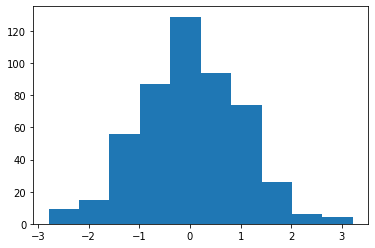

In [77]:
plt.hist(z_group["Age"])

In [80]:
fill_na_mean = lambda x:x.fillna(x.mean())

In [81]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,136.733813,80.084096,27.238071,19564.281906
1,160.838357,67.835852,60.555141,19945.436245
2,144.312921,60.187235,17.966472,18282.428696
3,168.162294,59.219532,19.468159,20925.797965
4,144.963085,105.124112,21.476955,20262.010165
...,...,...,...,...
495,153.900489,101.876509,29.033190,19261.537741
496,180.621738,25.676517,29.705002,21423.738239
497,181.369719,108.047048,19.764914,19642.821931
498,171.867824,87.510706,37.119991,19169.041397


## Operaciones diversas muy útiles

In [82]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,136.733813,80.084096,27.238071,19564.281906
2,Female,Rich,144.312921,60.187235,17.966472,18282.428696
3,Male,Rich,168.162294,59.219532,19.468159,20925.797965
6,Male,Medium,169.079973,67.828165,34.231885,18157.722858
8,Male,Poor,182.383554,54.308383,22.353895,19788.460700
12,Female,Medium,163.363164,104.880257,20.735165,20514.306808


In [84]:
double_group.nth(32) # Enesimo elemento de un grupo de datos. Si no existe ese n-simo no se muestra.

Height      Weight        Age        Income
Gender Economic Status                                                 
Female Medium           124.949644   41.347789  31.328111  20450.502665
       Poor             145.035547   56.860604  30.467824  19174.810427
       Rich             167.683317   74.914873  45.104764  18299.009649
Male   Medium           139.681160   85.080314  16.215602  18252.405715
       Poor             181.517287  104.927006  13.120332  18755.402977
       Rich             214.078907  107.922074  17.543051  19194.900900

In [86]:
data_sorted = data.sort_values(["Age", "Income"])

In [87]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
54,Female,Poor,168.529156,79.653915,-1.440528,20595.214120
396,Male,Poor,179.314440,98.702597,-0.293544,19710.319617
364,Female,Rich,145.411555,92.956502,-0.202517,19268.584308
7,Male,Rich,141.355077,87.952695,0.854145,20904.515775
194,Female,Poor,146.578383,6.452526,0.935027,18831.768002
17,Male,Poor,153.079648,117.808360,1.224524,19499.810400
97,Male,Rich,111.855160,54.755088,3.432045,18368.121095
192,Female,Poor,159.354513,109.592491,3.972537,20612.829676
55,Male,Poor,161.656005,97.139866,5.845396,21389.600248
184,Female,Medium,190.816053,37.543442,5.852030,20941.539085


In [89]:
age_grouped = data_sorted.groupby("Gender")
age_grouped.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
54,Female,Poor,168.529156,79.653915,-1.440528,20595.214120
396,Male,Poor,179.314440,98.702597,-0.293544,19710.319617
364,Female,Rich,145.411555,92.956502,-0.202517,19268.584308
7,Male,Rich,141.355077,87.952695,0.854145,20904.515775
194,Female,Poor,146.578383,6.452526,0.935027,18831.768002
17,Male,Poor,153.079648,117.808360,1.224524,19499.810400
97,Male,Rich,111.855160,54.755088,3.432045,18368.121095
192,Female,Poor,159.354513,109.592491,3.972537,20612.829676
55,Male,Poor,161.656005,97.139866,5.845396,21389.600248
184,Female,Medium,190.816053,37.543442,5.852030,20941.539085


## Conjunto de entrenamiento y conjunto de testing

In [90]:
filepath = datasets_dir + os.sep + r'customer-churn-model\Customer Churn Model.txt'

In [91]:
data = pd.read_csv(filepath)

3333

### Dividir usando la distribución normal

In [92]:
a = np.random.randn(len(data))

(array([   3.,   41.,  219.,  639., 1072.,  875.,  365.,  106.,   10.,
           3.]),
 array([-3.81251838, -3.00842991, -2.20434143, -1.40025296, -0.59616449,
         0.20792399,  1.01201246,  1.81610094,  2.62018941,  3.42427788,
         4.22836636]),
 <a list of 10 Patch objects>)

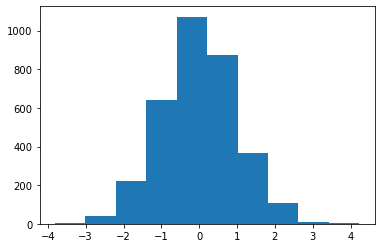

In [93]:
plt.hist(a)

In [94]:
# De la distribución anterior nos quedamos con aquellos valores que son menores de 0.8
check = (a<0.8)

(array([ 662.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2671.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

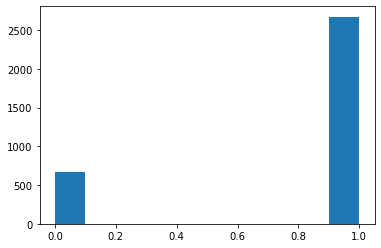

In [98]:
plt.hist(check.astype(int)) # el 0.8 son true y el 0.2 False

In [100]:
data_training = data[check]
data_test = data[~check]

## Librería SKLEARN

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
training, test = train_test_split(data, test_size=0.2) # El tamaño para testeo será 0.2

## Usando una función de shuffle

In [107]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [109]:
from sklearn.utils import shuffle

In [112]:
data = shuffle(data)

In [113]:
train_data = data[:int(0.75*len(data))]
test_data = data[:int(0.25*len(data))]